# Collaboration and Competition

---

This notebook runs John's solution for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.  It uses the Unity ML-Agents environment to train two cooperative agents to play a tennis-like game.

**Need more description here - refer to readme?**






...


This code depends upon a custom Unity environment provided by the Udacity staff that embodies the variation on tennis.  It will open a separate Unity window for visualizing the environment as the agents train or play.


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from train import train
from maddpg import Maddpg

%matplotlib inline

# create a new Unity environment
# it needs to be done once, outside any loop, as closing an environment then restarting causes
# a Unity exception about the handle no longer being active.
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64", seed=0, 
                       no_graphics=True)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]                       
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## Train the agents

The next cells will invoke the training program to create the agents.  All of the real code is in Python flat files in this project directory.

In [2]:
import numpy as np

class RandomSampler():
    
    def __init__(self, vars):
        """Accepts definition of the set of variables to be sampled.
            
            Params:
                vars (list of lists): each item is a list containing:
                                        item 0 - either 'discrete', 'continuous-int' or 'continuous-float'
                                        items 1-N depend on the value of item 0:
                                        if discrete, then these are the set of values to be chosen from
                                        if continuous then these are the min & max bounds of the range
        """
        
        self.vars = vars
        
        self.rng = np.random.default_rng()
    
    
    def sample(self):
        """Draws a random sample of all variables at its disposal.
        
            Returns a list of values in the order of definition.
        """

        rtn = []
        for v in self.vars:
            if v[0] == "discrete":
                choice = self.rng.integers(low=1, high=len(v), size=1)[0]
                rtn.append(v[choice])
                
            elif v[0] == "continuous-int":
                choice = self.rng.integers(low=v[1], high=v[2], size=1)[0]
                rtn.append(choice)
                
            elif v[0] == "continuous-float":
                choice = self.rng.random() * (v[2]-v[1]) + v[1]
                rtn.append(choice)
            
            else:
                print("///// RandomSampler error:  unknown type ", v[0])
            
        return rtn
                
vars = [["discrete", 88, 66, 11, 22, 33, 44, 99, 101, 77],
        ["discrete", 500], #1-item list
        ["continuous-int", 43, 44], #1-item range
        ["continuous-int", 0, 10],
        ["continuous-float", 0.0, 1.0],
        ["continuous-float", -3.3, 0.0],
        ["continuous-float", -1.0, 6.4],
       ]
rs = RandomSampler(vars)

for i in range(3):
    out = rs.sample()
    print("\n", i, "\n", out)



 0 
 [66, 500, 43, 3, 0.3697103850332508, -0.8348054706022716, 1.2088684143340767]

 1 
 [11, 500, 43, 9, 0.5127160434822841, -1.9848713829957694, 3.1775413740314304]

 2 
 [11, 500, 43, 5, 0.016763938416553548, -2.9591205142886925, 1.2948149849838884]


Ready to train M37 over 40 training sets for 15001 episodes each, with fixed params:
    Max episodes  =  15001
    Weight decay  =  0.0
    Gamma         =  0.99
    Buf prime size=  5000

///// Beginning training set  M37.00  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999978
      Noise scale      = 0.039
      LR actor         = 0.0000234
      LR critic        = 0.0000091
      Learning every      81  time steps
      Learn iterations =  2
      Tau              = 0.00212
      Seed             =  44939
2000	Average score:   0.003,        mem:   8703/    63 ( 0.7%), avg 1491.9 eps/min;  0.1 hr rem   .......................
2037	Running avg/max: 0.007/0.300,  mem:   8765/    68 ( 0.8%), avg 1494.6 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  11622/    70 ( 0.6%), avg 1655.4 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  14519/    70 ( 0.5%), avg 1715.5 eps

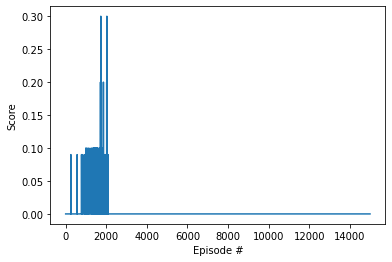


///// Beginning training set  M37.01  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999926
      Noise scale      = 0.039
      LR actor         = 0.0000525
      LR critic        = 0.0000026
      Learning every      76  time steps
      Learn iterations =  1
      Tau              = 0.00183
      Seed             =  44939
628	Running avg/max: 0.006/0.100,  mem:   6134/    32 ( 0.5%), avg 1597.6 eps/min   .......................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   8557/    57 ( 0.7%), avg 1578.2 eps/min;  0.1 hr rem   
3158	Running avg/max: 0.000/0.000,  mem:  10311/    57 ( 0.6%), avg 1653.7 eps/min   
* noise mult = 0.0005
4000	Average score:   0.000,        mem:  11483/    57 ( 0.5%), avg 1684.9 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  14403/    57 ( 0.4%), avg 1741.5 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  172

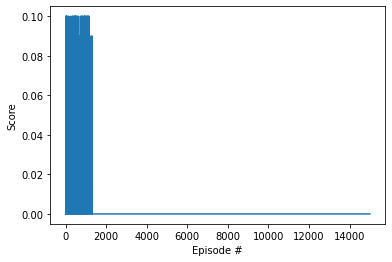


///// Beginning training set  M37.02  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999926
      Noise scale      = 0.037
      LR actor         = 0.0000633
      LR critic        = 0.0000160
      Learning every      95  time steps
      Learn iterations =  2
      Tau              = 0.00223
      Seed             =  44939
649	Running avg/max: 0.000/0.000,  mem:   6126/    23 ( 0.4%), avg 1583.3 eps/min   ...................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   8087/    23 ( 0.3%), avg 1733.4 eps/min;  0.1 hr rem   
3488	Running avg/max: 0.000/0.000,  mem:  10233/    23 ( 0.2%), avg 1787.9 eps/min   
* noise mult = 0.0005
4000	Average score:   0.000,        mem:  10966/    23 ( 0.2%), avg 1785.7 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  13819/    23 ( 0.2%), avg 1795.2 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  16752/ 

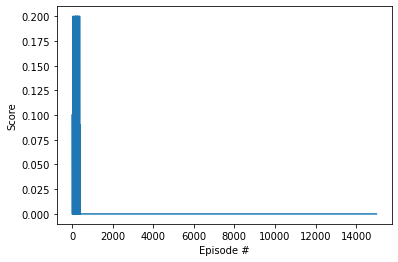


///// Beginning training set  M37.03  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999990
      Noise scale      = 0.037
      LR actor         = 0.0000475
      LR critic        = 0.0000021
      Learning every      91  time steps
      Learn iterations =  2
      Tau              = 0.00187
      Seed             =  44939
2000	Average score:   0.000,        mem:   8266/    53 ( 0.6%), avg 1698.0 eps/min;  0.1 hr rem   .........................
4000	Average score:   0.000,        mem:  11122/    53 ( 0.5%), avg 1722.9 eps/min;  0.1 hr rem   
5582	Running avg/max: 0.000/0.000,  mem:  13460/    53 ( 0.4%), avg 1660.5 eps/min   
* noise mult = 0.2
6000	Average score:   0.000,        mem:  14056/    53 ( 0.4%), avg 1653.6 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  16918/    53 ( 0.3%), avg 1625.2 eps/min;  0.1 hr rem   
10000	Average score:   0.000,        mem:  19815/    53 ( 0.3%), av

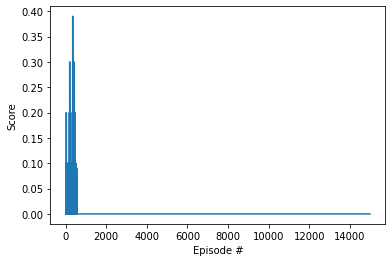


///// Beginning training set  M37.04  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999930
      Noise scale      = 0.044
      LR actor         = 0.0000765
      LR critic        = 0.0000058
      Learning every      88  time steps
      Learn iterations =  2
      Tau              = 0.00233
      Seed             =  44939
651	Running avg/max: 0.004/0.200,  mem:   6211/    25 ( 0.4%), avg 1219.6 eps/min   ......................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   8182/    26 ( 0.3%), avg 1400.9 eps/min;  0.2 hr rem   
3677	Running avg/max: 0.000/0.000,  mem:  10596/    26 ( 0.2%), avg 1440.9 eps/min   
* noise mult = 0.0005
4000	Average score:   0.000,        mem:  11045/    26 ( 0.2%), avg 1443.7 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  13956/    26 ( 0.2%), avg 1462.7 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  1685

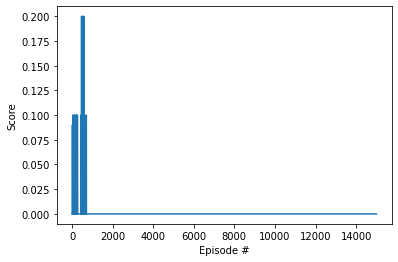


///// Beginning training set  M37.05  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999935
      Noise scale      = 0.051
      LR actor         = 0.0000695
      LR critic        = 0.0000150
      Learning every      92  time steps
      Learn iterations =  2
      Tau              = 0.00225
      Seed             =  44939
737	Running avg/max: 0.004/0.300,  mem:   6274/    19 ( 0.3%), avg 1312.7 eps/min   ........................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   8139/    28 ( 0.3%), avg 1428.3 eps/min;  0.2 hr rem   
3982	Running avg/max: 0.000/0.000,  mem:  10973/    28 ( 0.3%), avg 1475.3 eps/min   
* noise mult = 0.0005
4000	Average score:   0.000,        mem:  10998/    28 ( 0.3%), avg 1476.0 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  13918/    28 ( 0.2%), avg 1486.1 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  16

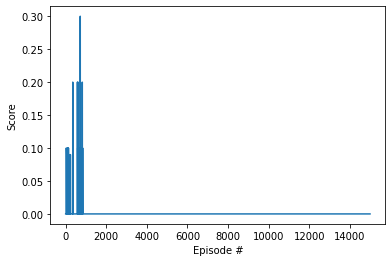


///// Beginning training set  M37.06  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999991
      Noise scale      = 0.042
      LR actor         = 0.0000476
      LR critic        = 0.0000013
      Learning every      82  time steps
      Learn iterations =  2
      Tau              = 0.00240
      Seed             =  44939
2000	Average score:   0.000,        mem:   8010/     0 ( 0.0%), avg 1796.8 eps/min;  0.1 hr rem   ..........................
4000	Average score:   0.000,        mem:  10862/     0 ( 0.0%), avg 1838.0 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  13776/     0 ( 0.0%), avg 1851.2 eps/min;  0.1 hr rem   
6369	Running avg/max: 0.000/0.000,  mem:  14325/     0 ( 0.0%), avg 1854.8 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:  16666/     0 ( 0.0%), avg 1849.6 eps/min;  0.1 hr rem   
10000	Average score:   0.000,        mem:  19567/     0 ( 0.0%), a

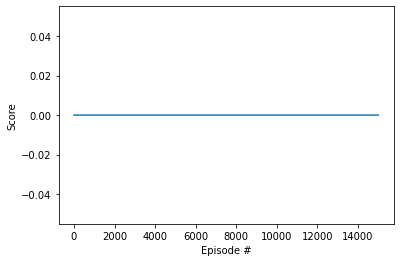


///// Beginning training set  M37.07  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999936
      Noise scale      = 0.043
      LR actor         = 0.0000513
      LR critic        = 0.0000138
      Learning every      78  time steps
      Learn iterations =  1
      Tau              = 0.00249
      Seed             =  44939
684	Running avg/max: 0.000/0.000,  mem:   6297/     5 ( 0.1%), avg 1489.3 eps/min   ........................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   8266/     5 ( 0.1%), avg 1710.8 eps/min;  0.1 hr rem   
3945	Running avg/max: 0.000/0.000,  mem:  11047/     5 ( 0.0%), avg 1809.9 eps/min   
* noise mult = 0.0005
4000	Average score:   0.000,        mem:  11126/     5 ( 0.0%), avg 1811.3 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  14049/     5 ( 0.0%), avg 1835.7 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  16

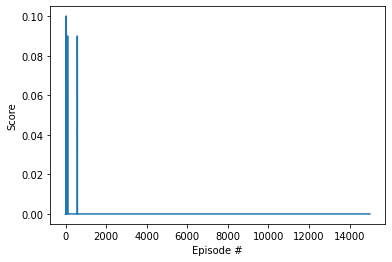


///// Beginning training set  M37.08  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999985
      Noise scale      = 0.048
      LR actor         = 0.0000539
      LR critic        = 0.0000135
      Learning every      79  time steps
      Learn iterations =  2
      Tau              = 0.00199
      Seed             =  44939
2000	Average score:   0.000,        mem:   8088/    29 ( 0.4%), avg 1742.7 eps/min;  0.1 hr rem   .......................
3701	Running avg/max: 0.000/0.000,  mem:  10555/    29 ( 0.3%), avg 1749.1 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  10980/    29 ( 0.3%), avg 1748.8 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  13906/    29 ( 0.2%), avg 1753.2 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  16722/    29 ( 0.2%), avg 1757.0 eps/min;  0.1 hr rem   
10000	Average score:   0.000,        mem:  19643/    29 ( 0.1%), avg 

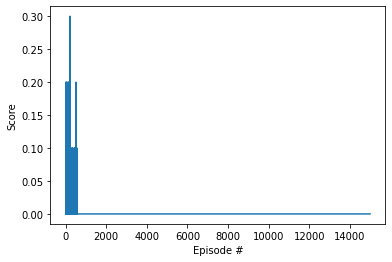


///// Beginning training set  M37.09  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999991
      Noise scale      = 0.053
      LR actor         = 0.0000171
      LR critic        = 0.0000018
      Learning every      91  time steps
      Learn iterations =  2
      Tau              = 0.00225
      Seed             =  44939
2000	Average score:   0.003,        mem:   8738/   103 ( 1.2%), avg 1507.1 eps/min;  0.1 hr rem   .........................
4000	Average score:   0.000,        mem:  11826/   110 ( 0.9%), avg 1614.0 eps/min;  0.1 hr rem   
5449	Running avg/max: 0.000/0.000,  mem:  13926/   110 ( 0.8%), avg 1664.8 eps/min   
* noise mult = 0.2
6000	Average score:   0.000,        mem:  14725/   110 ( 0.7%), avg 1687.0 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  17605/   110 ( 0.6%), avg 1723.4 eps/min;  0.1 hr rem   
10000	Average score:   0.000,        mem:  20494/   110 ( 0.5%), av

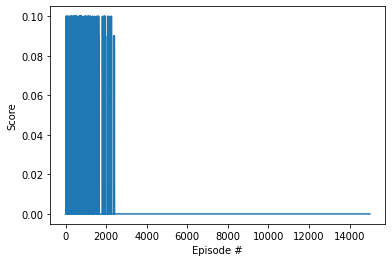


///// Beginning training set  M37.10  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999934
      Noise scale      = 0.037
      LR actor         = 0.0000582
      LR critic        = 0.0000092
      Learning every      85  time steps
      Learn iterations =  2
      Tau              = 0.00176
      Seed             =  44939
729	Running avg/max: 0.001/0.100,  mem:   6261/    34 ( 0.5%), avg 1344.9 eps/min   .....................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   8161/    37 ( 0.5%), avg 1436.5 eps/min;  0.2 hr rem   
3873	Running avg/max: 0.000/0.000,  mem:  10875/    37 ( 0.3%), avg 1491.9 eps/min   
* noise mult = 0.0005
4000	Average score:   0.000,        mem:  11037/    37 ( 0.3%), avg 1494.5 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  13955/    37 ( 0.3%), avg 1512.7 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  16789

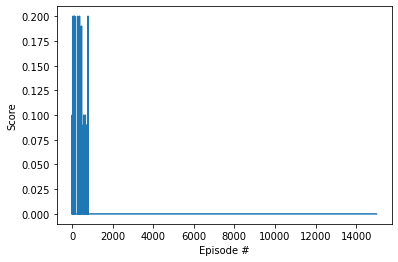


///// Beginning training set  M37.11  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999963
      Noise scale      = 0.053
      LR actor         = 0.0000119
      LR critic        = 0.0000015
      Learning every      84  time steps
      Learn iterations =  2
      Tau              = 0.00193
      Seed             =  44939
1236	Running avg/max: 0.000/0.000,  mem:   7205/     6 ( 0.1%), avg 1230.6 eps/min   ......................................
* noise mult = 0.2
2000	Average score:   0.002,        mem:   8551/    24 ( 0.3%), avg 1244.0 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:  11640/    50 ( 0.4%), avg 1333.8 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  14771/    51 ( 0.3%), avg 1368.7 eps/min;  0.1 hr rem   
6386	Running avg/max: 0.004/0.100,  mem:  15419/    63 ( 0.4%), avg 1360.0 eps/min   
* noise mult = 0.0005
8000	Average score:   0.000,        mem:  180

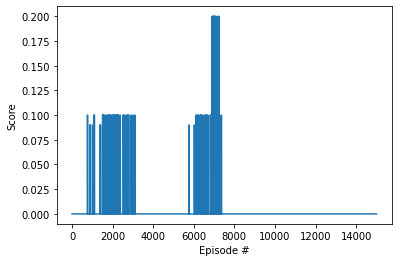


///// Beginning training set  M37.12  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999950
      Noise scale      = 0.041
      LR actor         = 0.0000606
      LR critic        = 0.0000104
      Learning every      100  time steps
      Learn iterations =  1
      Tau              = 0.00236
      Seed             =  44939
890	Running avg/max: 0.010/0.200,  mem:   6714/    82 ( 1.2%), avg 1141.8 eps/min   .......................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   8757/   109 ( 1.2%), avg 1149.7 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:  11636/   109 ( 0.9%), avg 1282.4 eps/min;  0.1 hr rem   
4831	Running avg/max: 0.000/0.000,  mem:  12880/   109 ( 0.8%), avg 1311.4 eps/min   
* noise mult = 0.0005
6000	Average score:   0.000,        mem:  14548/   109 ( 0.7%), avg 1332.6 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  17

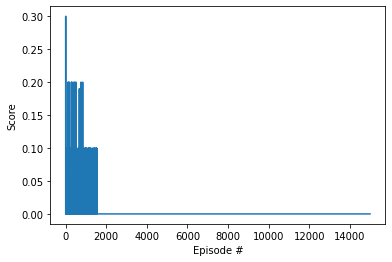


///// Beginning training set  M37.13  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999970
      Noise scale      = 0.051
      LR actor         = 0.0000451
      LR critic        = 0.0000081
      Learning every      90  time steps
      Learn iterations =  2
      Tau              = 0.00221
      Seed             =  44939
1764	Running avg/max: 0.000/0.000,  mem:   7764/    35 ( 0.5%), avg 1496.4 eps/min   ........................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   8109/    35 ( 0.4%), avg 1507.0 eps/min;  0.1 hr rem   
4000	Average score:   0.000,        mem:  10983/    35 ( 0.3%), avg 1533.0 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  13898/    35 ( 0.3%), avg 1539.3 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  16777/    35 ( 0.2%), avg 1541.6 eps/min;  0.1 hr rem   
8823	Running avg/max: 0.000/0.000,  mem:  17971/    

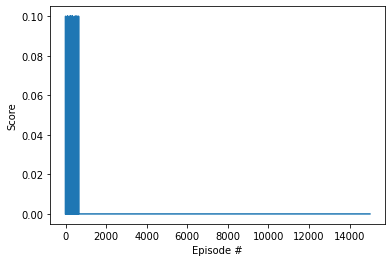


///// Beginning training set  M37.14  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999976
      Noise scale      = 0.043
      LR actor         = 0.0000515
      LR critic        = 0.0000102
      Learning every      83  time steps
      Learn iterations =  2
      Tau              = 0.00256
      Seed             =  44939
2000	Average score:   0.000,        mem:   8310/    27 ( 0.3%), avg 1388.4 eps/min;  0.2 hr rem   .......................
2051	Running avg/max: 0.000/0.000,  mem:   8380/    27 ( 0.3%), avg 1392.7 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  11191/    27 ( 0.2%), avg 1476.9 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  14097/    27 ( 0.2%), avg 1481.7 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  16932/    27 ( 0.2%), avg 1496.2 eps/min;  0.1 hr rem   
10000	Average score:   0.000,        mem:  19871/    27 ( 0.1%), avg 

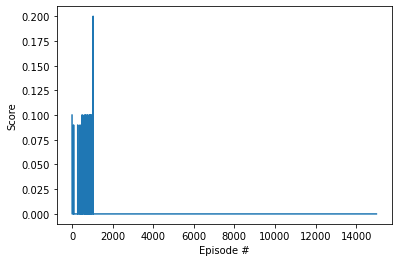


///// Beginning training set  M37.15  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999983
      Noise scale      = 0.047
      LR actor         = 0.0000429
      LR critic        = 0.0000119
      Learning every      95  time steps
      Learn iterations =  1
      Tau              = 0.00260
      Seed             =  44939
2000	Average score:   0.004,        mem:   8692/    75 ( 0.9%), avg 1283.8 eps/min;  0.2 hr rem   ........................
2869	Running avg/max: 0.000/0.000,  mem:   9997/    82 ( 0.8%), avg 1354.3 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  11579/    82 ( 0.7%), avg 1412.9 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  14504/    82 ( 0.6%), avg 1462.1 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  17393/    82 ( 0.5%), avg 1490.0 eps/min;  0.1 hr rem   
10000	Average score:   0.000,        mem:  20271/    82 ( 0.4%), avg

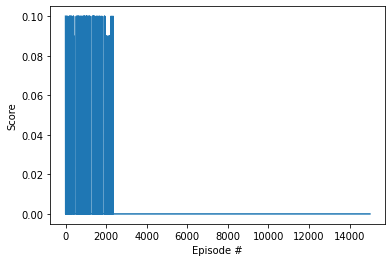


///// Beginning training set  M37.16  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999984
      Noise scale      = 0.037
      LR actor         = 0.0000104
      LR critic        = 0.0000020
      Learning every      92  time steps
      Learn iterations =  1
      Tau              = 0.00194
      Seed             =  44939
2000	Average score:   0.002,        mem:   8923/    45 ( 0.5%), avg 850.2 eps/min;  0.3 hr rem   ...........................
2607	Running avg/max: 0.002/0.100,  mem:  10114/    55 ( 0.5%), avg 842.6 eps/min   
* noise mult = 0.2
4000	Average score:   0.003,        mem:  12879/    84 ( 0.7%), avg 858.6 eps/min;  0.2 hr rem   
6000	Average score:   0.004,        mem:  16516/   141 ( 0.9%), avg 890.1 eps/min;  0.2 hr rem   
8000	Average score:   0.004,        mem:  19857/   240 ( 1.2%), avg 925.0 eps/min;  0.1 hr rem   
10000	Average score:   0.000,        mem:  22784/   252 ( 1.1%), avg 9

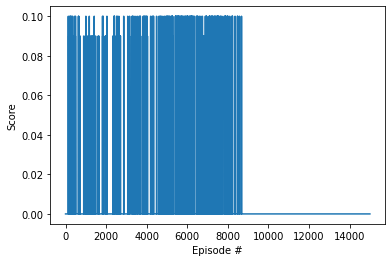


///// Beginning training set  M37.17  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999927
      Noise scale      = 0.049
      LR actor         = 0.0000618
      LR critic        = 0.0000178
      Learning every      77  time steps
      Learn iterations =  1
      Tau              = 0.00218
      Seed             =  44939
597	Running avg/max: 0.001/0.100,  mem:   6124/     3 ( 0.0%), avg 1254.5 eps/min   ......................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   8593/    43 ( 0.5%), avg 1289.1 eps/min;  0.2 hr rem   
3178	Running avg/max: 0.000/0.000,  mem:  10296/    43 ( 0.4%), avg 1382.0 eps/min   
* noise mult = 0.0005
4000	Average score:   0.000,        mem:  11455/    43 ( 0.4%), avg 1416.8 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  14375/    43 ( 0.3%), avg 1455.4 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  1726

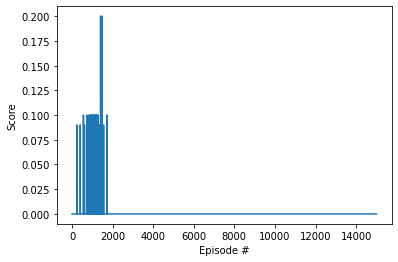


///// Beginning training set  M37.18  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999985
      Noise scale      = 0.051
      LR actor         = 0.0000554
      LR critic        = 0.0000076
      Learning every      87  time steps
      Learn iterations =  2
      Tau              = 0.00223
      Seed             =  44939
2000	Average score:   0.000,        mem:   8007/     3 ( 0.0%), avg 1482.1 eps/min;  0.1 hr rem   .........................
3726	Running avg/max: 0.000/0.000,  mem:  10489/     3 ( 0.0%), avg 1469.5 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  10873/     3 ( 0.0%), avg 1471.0 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  13781/     3 ( 0.0%), avg 1485.0 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  16657/     3 ( 0.0%), avg 1493.2 eps/min;  0.1 hr rem   
10000	Average score:   0.000,        mem:  19557/     3 ( 0.0%), av

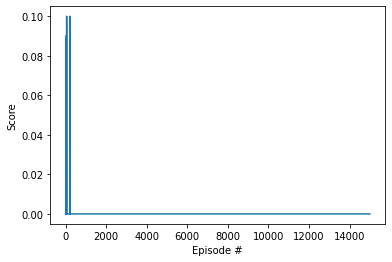


///// Beginning training set  M37.19  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999938
      Noise scale      = 0.039
      LR actor         = 0.0000489
      LR critic        = 0.0000092
      Learning every      84  time steps
      Learn iterations =  2
      Tau              = 0.00259
      Seed             =  44939
724	Running avg/max: 0.008/0.100,  mem:   6339/    23 ( 0.4%), avg 1209.0 eps/min   ........................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   8211/    29 ( 0.4%), avg 1358.5 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:  11064/    29 ( 0.3%), avg 1382.6 eps/min;  0.1 hr rem   
4111	Running avg/max: 0.000/0.000,  mem:  11229/    29 ( 0.3%), avg 1380.7 eps/min   
* noise mult = 0.0005
6000	Average score:   0.000,        mem:  13992/    29 ( 0.2%), avg 1390.9 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  16

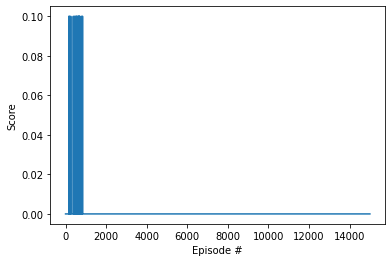


///// Beginning training set  M37.20  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999955
      Noise scale      = 0.054
      LR actor         = 0.0000498
      LR critic        = 0.0000094
      Learning every      98  time steps
      Learn iterations =  1
      Tau              = 0.00183
      Seed             =  44939
1009	Running avg/max: 0.003/0.100,  mem:   6795/    19 ( 0.3%), avg 1292.5 eps/min   ...................................
* noise mult = 0.2
2000	Average score:   0.005,        mem:   8510/    55 ( 0.6%), avg 1326.9 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:  11450/    66 ( 0.6%), avg 1444.4 eps/min;  0.1 hr rem   
5482	Running avg/max: 0.000/0.000,  mem:  13616/    66 ( 0.5%), avg 1489.4 eps/min   
* noise mult = 0.0005
6000	Average score:   0.000,        mem:  14367/    66 ( 0.5%), avg 1500.5 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  17203/

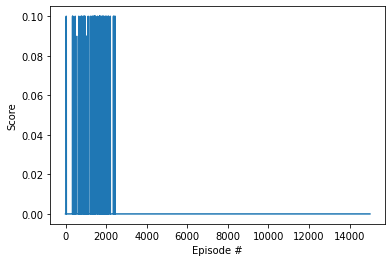


///// Beginning training set  M37.21  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999959
      Noise scale      = 0.045
      LR actor         = 0.0000447
      LR critic        = 0.0000067
      Learning every      79  time steps
      Learn iterations =  2
      Tau              = 0.00233
      Seed             =  44939
1344	Running avg/max: 0.000/0.000,  mem:   7013/    17 ( 0.2%), avg 1476.9 eps/min   ......................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   7965/    17 ( 0.2%), avg 1496.9 eps/min;  0.1 hr rem   
4000	Average score:   0.000,        mem:  10802/    17 ( 0.2%), avg 1494.4 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  13748/    17 ( 0.1%), avg 1491.5 eps/min;  0.1 hr rem   
6491	Running avg/max: 0.000/0.000,  mem:  14455/    17 ( 0.1%), avg 1490.8 eps/min   
* noise mult = 0.0005
8000	Average score:   0.000,        mem:  166

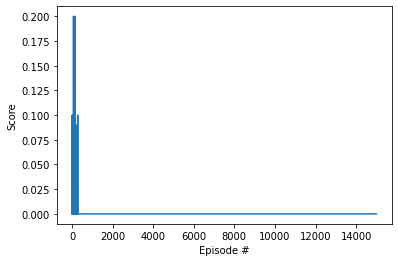


///// Beginning training set  M37.22  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999964
      Noise scale      = 0.052
      LR actor         = 0.0000378
      LR critic        = 0.0000100
      Learning every      81  time steps
      Learn iterations =  1
      Tau              = 0.00192
      Seed             =  44939
1303	Running avg/max: 0.009/0.200,  mem:   7394/    97 ( 1.3%), avg 1325.8 eps/min   ......................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   8622/   109 ( 1.3%), avg 1333.2 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:  11617/   110 ( 0.9%), avg 1424.4 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  14530/   110 ( 0.8%), avg 1473.4 eps/min;  0.1 hr rem   
7001	Running avg/max: 0.000/0.000,  mem:  15938/   110 ( 0.7%), avg 1491.4 eps/min   
* noise mult = 0.0005
8000	Average score:   0.000,        mem:  174

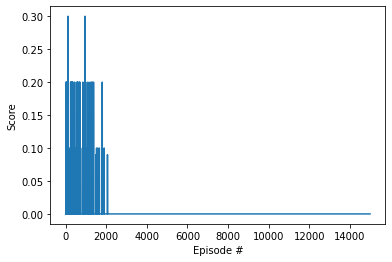


///// Beginning training set  M37.23  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999943
      Noise scale      = 0.045
      LR actor         = 0.0000583
      LR critic        = 0.0000172
      Learning every      96  time steps
      Learn iterations =  2
      Tau              = 0.00182
      Seed             =  44939
825	Running avg/max: 0.000/0.000,  mem:   6456/    51 ( 0.8%), avg 1291.3 eps/min   .....................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   8170/    51 ( 0.6%), avg 1396.3 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:  11066/    51 ( 0.5%), avg 1479.5 eps/min;  0.1 hr rem   
4528	Running avg/max: 0.000/0.000,  mem:  11826/    51 ( 0.4%), avg 1480.1 eps/min   
* noise mult = 0.0005
6000	Average score:   0.000,        mem:  13947/    51 ( 0.4%), avg 1501.4 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  16788

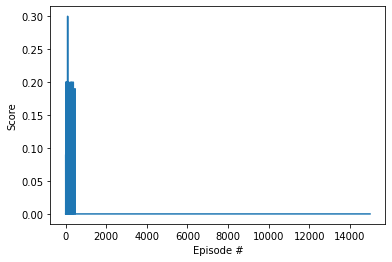


///// Beginning training set  M37.24  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999967
      Noise scale      = 0.047
      LR actor         = 0.0000714
      LR critic        = 0.0000040
      Learning every      79  time steps
      Learn iterations =  2
      Tau              = 0.00228
      Seed             =  44939
1665	Running avg/max: 0.000/0.000,  mem:   7508/    10 ( 0.1%), avg 1489.8 eps/min   .....................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   7994/    10 ( 0.1%), avg 1510.3 eps/min;  0.1 hr rem   
4000	Average score:   0.000,        mem:  10880/    10 ( 0.1%), avg 1520.0 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  13785/    10 ( 0.1%), avg 1529.5 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  16641/    10 ( 0.1%), avg 1536.6 eps/min;  0.1 hr rem   
8099	Running avg/max: 0.000/0.000,  mem:  16789/    10 

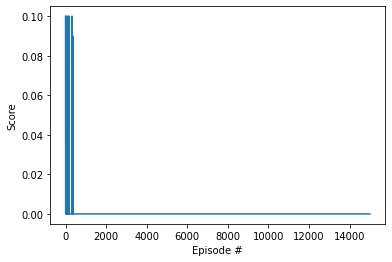


///// Beginning training set  M37.25  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999971
      Noise scale      = 0.039
      LR actor         = 0.0000245
      LR critic        = 0.0000168
      Learning every      92  time steps
      Learn iterations =  1
      Tau              = 0.00225
      Seed             =  44939
1625	Running avg/max: 0.000/0.000,  mem:   7817/    24 ( 0.3%), avg 1356.1 eps/min   .......................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   8407/    24 ( 0.3%), avg 1372.5 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:  11382/    24 ( 0.2%), avg 1466.8 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  14246/    24 ( 0.2%), avg 1497.1 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  17148/    24 ( 0.1%), avg 1511.9 eps/min;  0.1 hr rem   
8756	Running avg/max: 0.000/0.000,  mem:  18237/    2

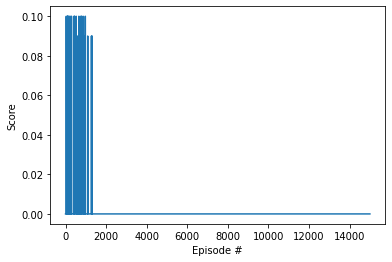


///// Beginning training set  M37.26  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999981
      Noise scale      = 0.043
      LR actor         = 0.0000469
      LR critic        = 0.0000090
      Learning every      85  time steps
      Learn iterations =  1
      Tau              = 0.00252
      Seed             =  44939
2000	Average score:   0.000,        mem:   8879/   123 ( 1.4%), avg 1265.6 eps/min;  0.2 hr rem   .........................
2337	Running avg/max: 0.000/0.000,  mem:   9404/   123 ( 1.3%), avg 1292.1 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  11778/   123 ( 1.0%), avg 1399.7 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  14706/   123 ( 0.8%), avg 1463.3 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  17578/   123 ( 0.7%), avg 1488.2 eps/min;  0.1 hr rem   
10000	Average score:   0.000,        mem:  20472/   123 ( 0.6%), av

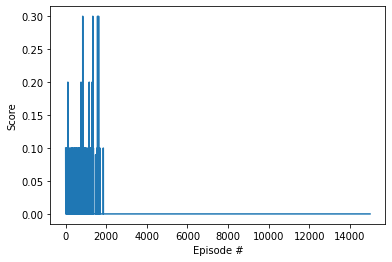


///// Beginning training set  M37.27  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999946
      Noise scale      = 0.047
      LR actor         = 0.0000206
      LR critic        = 0.0000131
      Learning every      80  time steps
      Learn iterations =  2
      Tau              = 0.00175
      Seed             =  44939
869	Running avg/max: 0.010/0.100,  mem:   6570/    50 ( 0.8%), avg 1291.3 eps/min   ......................................
* noise mult = 0.2
2000	Average score:   0.003,        mem:   8548/    97 ( 1.1%), avg 1292.1 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:  12026/   146 ( 1.2%), avg 1277.2 eps/min;  0.1 hr rem   
4154	Running avg/max: 0.000/0.000,  mem:  12282/   146 ( 1.2%), avg 1278.6 eps/min   
* noise mult = 0.0005
6000	Average score:   0.000,        mem:  15144/   153 ( 1.0%), avg 1320.7 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  1803

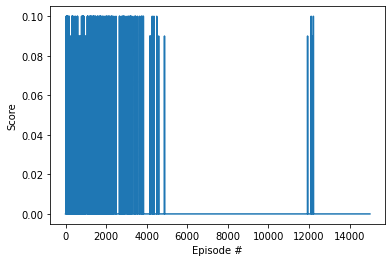


///// Beginning training set  M37.28  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999987
      Noise scale      = 0.051
      LR actor         = 0.0000764
      LR critic        = 0.0000131
      Learning every      83  time steps
      Learn iterations =  2
      Tau              = 0.00187
      Seed             =  44939
2000	Average score:   0.000,        mem:   7982/     4 ( 0.1%), avg 1439.3 eps/min;  0.2 hr rem   .......................
4000	Average score:   0.000,        mem:  10881/     4 ( 0.0%), avg 1474.6 eps/min;  0.1 hr rem   
4410	Running avg/max: 0.000/0.000,  mem:  11473/     4 ( 0.0%), avg 1476.8 eps/min   
* noise mult = 0.2
6000	Average score:   0.000,        mem:  13766/     4 ( 0.0%), avg 1491.3 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  16617/     4 ( 0.0%), avg 1500.8 eps/min;  0.1 hr rem   
10000	Average score:   0.000,        mem:  19556/     4 ( 0.0%), avg 

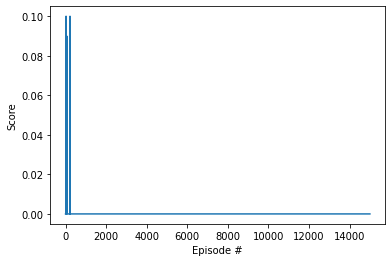


///// Beginning training set  M37.29  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999927
      Noise scale      = 0.049
      LR actor         = 0.0000131
      LR critic        = 0.0000130
      Learning every      76  time steps
      Learn iterations =  1
      Tau              = 0.00244
      Seed             =  44939
584	Running avg/max: 0.006/0.100,  mem:   6140/    28 ( 0.5%), avg 1234.7 eps/min   ........................................
* noise mult = 0.2
2000	Average score:   0.010,        mem:   8907/   128 ( 1.4%), avg 1244.4 eps/min;  0.2 hr rem   
2819	Running avg/max: 0.010/0.300,  mem:  10434/   176 ( 1.7%), avg 1249.2 eps/min   
* noise mult = 0.0005
4000	Average score:   0.004,        mem:  12469/   236 ( 1.9%), avg 1296.4 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  15448/   264 ( 1.7%), avg 1375.7 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  18

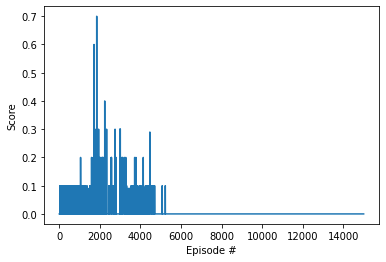


///// Beginning training set  M37.30  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999948
      Noise scale      = 0.052
      LR actor         = 0.0000693
      LR critic        = 0.0000038
      Learning every      84  time steps
      Learn iterations =  2
      Tau              = 0.00182
      Seed             =  44939
984	Running avg/max: 0.000/0.000,  mem:   6569/     9 ( 0.1%), avg 1363.9 eps/min   ......................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   8059/     9 ( 0.1%), avg 1433.2 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:  10930/     9 ( 0.1%), avg 1478.6 eps/min;  0.1 hr rem   
5034	Running avg/max: 0.000/0.000,  mem:  12447/     9 ( 0.1%), avg 1480.9 eps/min   
* noise mult = 0.0005
6000	Average score:   0.000,        mem:  13847/     9 ( 0.1%), avg 1492.6 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  1670

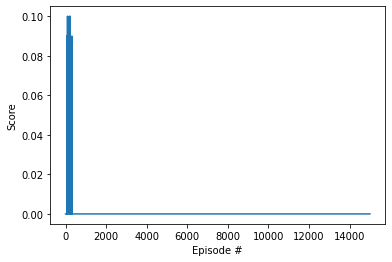


///// Beginning training set  M37.31  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999989
      Noise scale      = 0.036
      LR actor         = 0.0000434
      LR critic        = 0.0000137
      Learning every      87  time steps
      Learn iterations =  1
      Tau              = 0.00235
      Seed             =  44939
2000	Average score:   0.007,        mem:   8325/    18 ( 0.2%), avg 1407.3 eps/min;  0.2 hr rem   ........................
4000	Average score:   0.000,        mem:  11284/    33 ( 0.3%), avg 1461.4 eps/min;  0.1 hr rem   
4958	Running avg/max: 0.000/0.000,  mem:  12700/    33 ( 0.3%), avg 1479.6 eps/min   
* noise mult = 0.2
6000	Average score:   0.000,        mem:  14227/    33 ( 0.2%), avg 1490.7 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  17079/    33 ( 0.2%), avg 1508.7 eps/min;  0.1 hr rem   
10000	Average score:   0.000,        mem:  19980/    33 ( 0.2%), avg

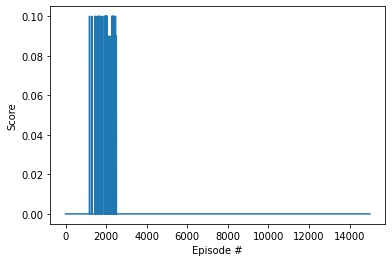


///// Beginning training set  M37.32  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999981
      Noise scale      = 0.037
      LR actor         = 0.0000630
      LR critic        = 0.0000113
      Learning every      90  time steps
      Learn iterations =  2
      Tau              = 0.00175
      Seed             =  44939
2000	Average score:   0.000,        mem:   8150/    36 ( 0.4%), avg 1401.5 eps/min;  0.2 hr rem   .........................
2874	Running avg/max: 0.000/0.000,  mem:   9418/    36 ( 0.4%), avg 1428.5 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  10991/    36 ( 0.3%), avg 1459.2 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  13935/    36 ( 0.3%), avg 1483.2 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  16818/    36 ( 0.2%), avg 1498.6 eps/min;  0.1 hr rem   
10000	Average score:   0.000,        mem:  19694/    36 ( 0.2%), av

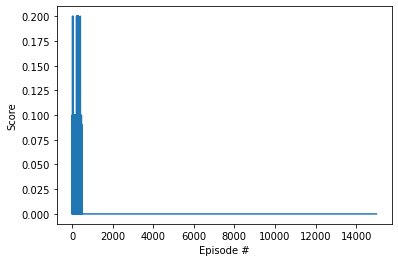


///// Beginning training set  M37.33  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999988
      Noise scale      = 0.046
      LR actor         = 0.0000682
      LR critic        = 0.0000140
      Learning every      85  time steps
      Learn iterations =  2
      Tau              = 0.00238
      Seed             =  44939
2000	Average score:   0.000,        mem:   8029/    17 ( 0.2%), avg 1510.8 eps/min;  0.1 hr rem   ........................
4000	Average score:   0.000,        mem:  10923/    17 ( 0.2%), avg 1541.5 eps/min;  0.1 hr rem   
4637	Running avg/max: 0.000/0.000,  mem:  11802/    17 ( 0.1%), avg 1541.8 eps/min   
* noise mult = 0.2
6000	Average score:   0.000,        mem:  13823/    17 ( 0.1%), avg 1542.8 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  16679/    17 ( 0.1%), avg 1543.2 eps/min;  0.1 hr rem   
10000	Average score:   0.000,        mem:  19594/    17 ( 0.1%), avg

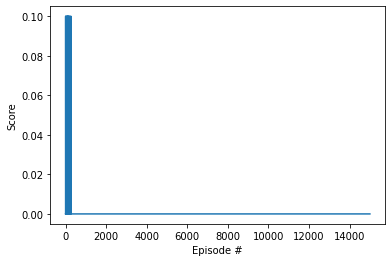


///// Beginning training set  M37.34  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999940
      Noise scale      = 0.053
      LR actor         = 0.0000581
      LR critic        = 0.0000067
      Learning every      96  time steps
      Learn iterations =  1
      Tau              = 0.00216
      Seed             =  44939
762	Running avg/max: 0.001/0.090,  mem:   6356/     2 ( 0.0%), avg 1072.6 eps/min   .....................................
* noise mult = 0.2
2000	Average score:   0.004,        mem:   8812/    59 ( 0.7%), avg 1148.3 eps/min;  0.2 hr rem   
3596	Running avg/max: 0.000/0.000,  mem:  11496/    64 ( 0.6%), avg 1240.8 eps/min   
* noise mult = 0.0005
4000	Average score:   0.000,        mem:  12043/    64 ( 0.5%), avg 1264.8 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  14993/    64 ( 0.4%), avg 1353.3 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  17839

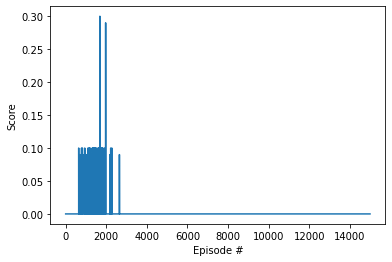


///// Beginning training set  M37.35  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999981
      Noise scale      = 0.048
      LR actor         = 0.0000249
      LR critic        = 0.0000126
      Learning every      93  time steps
      Learn iterations =  1
      Tau              = 0.00200
      Seed             =  44939
2000	Average score:   0.001,        mem:   8494/    50 ( 0.6%), avg 1356.8 eps/min;  0.2 hr rem   ........................
2516	Running avg/max: 0.001/0.090,  mem:   9321/    64 ( 0.7%), avg 1365.4 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  11660/   104 ( 0.9%), avg 1397.5 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  14611/   110 ( 0.8%), avg 1429.9 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  17508/   110 ( 0.6%), avg 1465.4 eps/min;  0.1 hr rem   
10000	Average score:   0.000,        mem:  20419/   110 ( 0.5%), avg

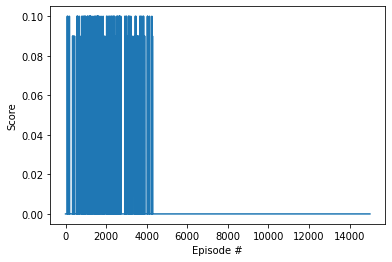


///// Beginning training set  M37.36  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999925
      Noise scale      = 0.047
      LR actor         = 0.0000271
      LR critic        = 0.0000078
      Learning every      100  time steps
      Learn iterations =  2
      Tau              = 0.00245
      Seed             =  44939
614	Running avg/max: 0.004/0.100,  mem:   6116/    28 ( 0.5%), avg 1264.4 eps/min   .....................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   8193/    37 ( 0.5%), avg 1430.1 eps/min;  0.2 hr rem   
3385	Running avg/max: 0.000/0.000,  mem:  10202/    37 ( 0.4%), avg 1475.9 eps/min   
* noise mult = 0.0005
4000	Average score:   0.000,        mem:  11091/    37 ( 0.3%), avg 1484.7 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  14016/    37 ( 0.3%), avg 1502.8 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  1683

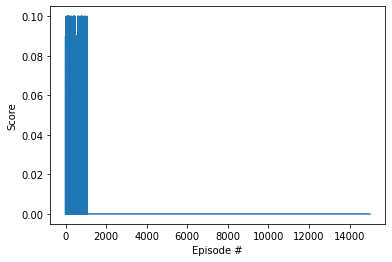


///// Beginning training set  M37.37  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999945
      Noise scale      = 0.040
      LR actor         = 0.0000300
      LR critic        = 0.0000170
      Learning every      81  time steps
      Learn iterations =  1
      Tau              = 0.00190
      Seed             =  44939
810	Running avg/max: 0.007/0.290,  mem:   6528/    72 ( 1.1%), avg 1272.3 eps/min   .......................................
* noise mult = 0.2
2000	Average score:   0.000,        mem:   8603/    99 ( 1.2%), avg 1336.1 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:  11502/    99 ( 0.9%), avg 1449.9 eps/min;  0.1 hr rem   
4399	Running avg/max: 0.000/0.000,  mem:  12104/    99 ( 0.8%), avg 1454.2 eps/min   
* noise mult = 0.0005
6000	Average score:   0.000,        mem:  14410/    99 ( 0.7%), avg 1484.6 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  173

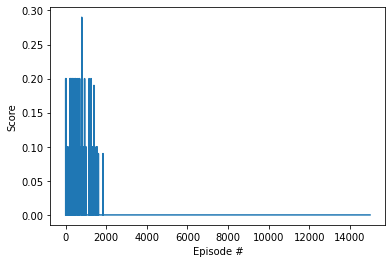


///// Beginning training set  M37.38  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999970
      Noise scale      = 0.042
      LR actor         = 0.0000671
      LR critic        = 0.0000108
      Learning every      97  time steps
      Learn iterations =  1
      Tau              = 0.00210
      Seed             =  44939
1620	Running avg/max: 0.005/0.100,  mem:   7735/     7 ( 0.1%), avg 1388.9 eps/min   ......................................
* noise mult = 0.2
2000	Average score:   0.002,        mem:   8392/    11 ( 0.1%), avg 1371.1 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:  11806/    35 ( 0.3%), avg 1369.8 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  14717/    35 ( 0.2%), avg 1427.3 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  17603/    35 ( 0.2%), avg 1468.9 eps/min;  0.1 hr rem   
8163	Running avg/max: 0.000/0.000,  mem:  17844/    35

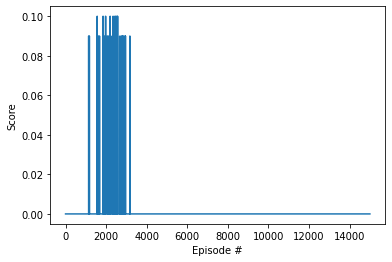


///// Beginning training set  M37.39  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999973
      Noise scale      = 0.038
      LR actor         = 0.0000415
      LR critic        = 0.0000160
      Learning every      77  time steps
      Learn iterations =  2
      Tau              = 0.00246
      Seed             =  44939
2000	Average score:   0.000,        mem:   7922/     7 ( 0.1%), avg 1493.5 eps/min;  0.1 hr rem   ..........................
2086	Running avg/max: 0.000/0.000,  mem:   8046/     7 ( 0.1%), avg 1496.0 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  10776/     7 ( 0.1%), avg 1481.4 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:  13695/     7 ( 0.1%), avg 1489.6 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:  16594/     7 ( 0.0%), avg 1492.6 eps/min;  0.1 hr rem   
9920	Running avg/max: 0.000/0.000,  mem:  19362/     7 ( 0.0%), av

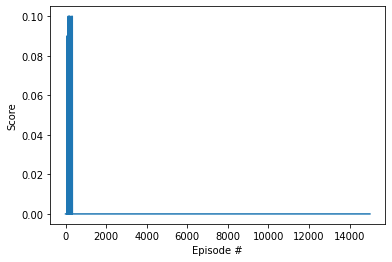



DONE!


In [3]:
# This cell will explore several combinations of hyperparams by training all of them
# Use a random search for the hyperparams

EXPLORE = True

TIME_STEPS         = 600
SAVE_ANALYSIS      = False
MODEL_DISPLAY_STEP = 0 #200k is approx 10k episodes at bad_step_prob = 0.01

if EXPLORE:
    
    # fixed for the session:
    RUN_PREFIX        = "M37"
    EPISODES          = 15001
    NUM_RUNS          = 40
    BAD_STEP_PROB     = 0.1
    BUFFER_PRIME_SIZE = 5000
    WEIGHT_DECAY      = 0.0 #was 1.0e-5
    GAMMA             = 0.99
    SEED              = 44939 #(0, 111, 468, 5555, 23100, 44939)
    
    # session variables:
    vars = [
            ["continuous-float", 0.15,     0.23],     #BAD_STEP_PROB
            ["continuous-float", 0.999924, 0.999999], #NOISE_DECAY
            ["continuous-float", 0.036,    0.054],    #NOISE_SCALE
            ["continuous-float", 0.000010, 0.000080], #LR_ACTOR
            ["continuous-float", 0.000001, 0.000020], #LR_CRITIC
            ["continuous-int",   75,       101],      #LEARN_EVERY
            ["continuous-int",   1,        3],        #LEARN_ITER
            ["continuous-float", 0.00174,  0.00262],  #TAU
            ["discrete",         128, 256]            #BATCH
           ]
    rs = RandomSampler(vars)
    
    print("Ready to train {} over {} training sets for {} episodes each, with fixed params:"
          .format(RUN_PREFIX, NUM_RUNS, EPISODES))
    print("    Max episodes  = ", EPISODES)
    print("    Weight decay  = ", WEIGHT_DECAY)
    print("    Gamma         = ", GAMMA)
    print("    Buf prime size= ", BUFFER_PRIME_SIZE)
            
    for set_id in range(NUM_RUNS):
        
        # sample the variables
        v = rs.sample()
        #BAD_STEP_PROB = v[0]
        NOISE_DECAY   = v[1]
        NOISE_SCALE   = v[2]
        LR_ACTOR      = v[3]
        LR_CRITIC     = v[4]
        LEARN_EVERY   = v[5]
        LEARN_ITER    = v[6]
        TAU           = v[7]
        BATCH         = v[8]

        # set the replay buffer size to that it fills after ~5000 bad episodes
        # (at ~14 experiences/episode), based on the bad step retention rate
        #buffer_size = int(60000 - 50000*(1.0 - BAD_STEP_PROB))
        buffer_size = 100000

        RUN_NAME = "{}.{:02d}".format(RUN_PREFIX, set_id)
        print("\n///// Beginning training set ", RUN_NAME, " with:")
        print("      Batch size       = {:d}".format(BATCH))
        print("      Buffer size      = {:d}".format(buffer_size))
        print("      Bad step prob    = {:.4f}".format(BAD_STEP_PROB))
        print("      Noise decay      = {:.6f}".format(NOISE_DECAY))
        print("      Noise scale      = {:.3f}".format(NOISE_SCALE))
        print("      LR actor         = {:.7f}".format(LR_ACTOR))
        print("      LR critic        = {:.7f}".format(LR_CRITIC))
        print("      Learning every     ", LEARN_EVERY, " time steps")
        print("      Learn iterations = ", LEARN_ITER)
        print("      Tau              = {:.5f}".format(TAU))
        print("      Seed             = ", SEED)

        ##### instantiate the agents and perform the training

        maddpg = Maddpg(state_size, action_size, 2, bad_step_prob=BAD_STEP_PROB,
                        random_seed=SEED, batch_size=BATCH, buffer_size=buffer_size,
                        noise_decay=NOISE_DECAY, buffer_prime_size=BUFFER_PRIME_SIZE,
                        learn_every=LEARN_EVERY, 
                        learn_iter=LEARN_ITER, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC,
                        weight_decay=WEIGHT_DECAY, gamma=GAMMA, noise_scale=NOISE_SCALE,
                        tau=TAU, model_display_step=MODEL_DISPLAY_STEP)

        scores = train(maddpg, env, run_name=RUN_NAME, max_episodes=EPISODES, 
                       winning_score=0.5, max_time_steps=TIME_STEPS,
                       checkpoint_interval=2000)

        ##### plot the training reward history

        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.plot(np.arange(len(scores)), scores)
        plt.ylabel('Score')
        plt.xlabel('Episode #')
        plt.show()

        ##### store the action/noise data, if being used

        if SAVE_ANALYSIS:
            maddpg.save_anal_data(RUN_PREFIX)

                            
    print("\n\nDONE!")

# HEY JOHN - TODO!

- update main.py to match the above code {ALL CELLS}
- Test running from cmd line (may need a script?)
- Clean up the bottom part of this notebook

In [4]:
# load a pre-trained (or partially trained) model and run it in inference mode to watch it perform

#m = Maddpg(24, 2, 2)
#check = m.restore_checkpoint("checkpoint/", "TEST.00", 20)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
"""
for i in range(10):                                        # play game for several episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations             3     # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    num_steps = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        num_steps += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Episode {}: {:5.3f}, took {} steps'.format(i, np.max(scores), num_steps))
"""

"\nfor i in range(10):                                        # play game for several episodes\n    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \n    states = env_info.vector_observations             3     # get the current state (for each agent)\n    scores = np.zeros(num_agents)                          # initialize the score (for each agent)\n    num_steps = 0\n    while True:\n        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n        env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n        next_states = env_info.vector_observations         # get next state (for each agent)\n        rewards = env_info.rewards                         # get reward (for each agent)\n        dones = env_info.local_done                        # see if episode finished\n        scores += env_i

When finished, you can close the environment.

In [6]:
env.close()